# Predicting the Elite 8 - March Madness Project

### Import Statements

In [1]:
import importlib
import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MySimpleLinearRegressor, MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomClassifier, MyZeroRClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import plot_utils

### Data Preparation

In [2]:
# Load in data from path
the_file = ("input_data/college-basketball.csv")
basketball_table = MyPyTable().load_from_file(the_file)

# Get the columns
seed = basketball_table.get_column("seed")
school = basketball_table.get_column("school")
w_l = basketball_table.get_column("w-l%")
pts = basketball_table.get_column("pts/g")
elite8 = basketball_table.get_column("elite8?")

# X_train
X_train = []
# y_train
y_train = []

# Fill the X_train
for row in range(len(basketball_table.data)):
    tmp = []
    for col in range(len(basketball_table.data[0]) - 2):
        if(col != 1):
            tmp.append(basketball_table.data[row][col])
    X_train.append(tmp)

# Fill the y_train
for row in range(len(basketball_table.data)):
    y_train.append(basketball_table.data[row][-2])
    
# Make a MyKNeighborsClassifier obj
knn = MyKNeighborsClassifier()
# Insert the X_train and y_train
knn.fit(X_train, y_train)
# Print
#print(knn.X_train)
#print(knn.y_train)

#knn_test = [[3, 0.781, 81.4]]
#knn_prediction = knn.predict(knn_test)
#print(knn_prediction)

# Make a MyNaiveBayesClassifier obj
naivebayes = MyNaiveBayesClassifier()
# Insert the X_train and y_train
naivebayes.fit(X_train, y_train)
# Print
#print(naivebayes.X_train)
#print(naivebayes.y_train)

# Make a MyDecisionTreeClassifier obj
tree = MyDecisionTreeClassifier()
# Insert the X_train and y_train
tree.fit(X_train, y_train)
# Print
#print(tree.X_train)
#print(tree.y_train)
#print(tree.tree)

<h3>College Basketball Data Comparisons</h3>

<h4>Seed Distributions</h4>

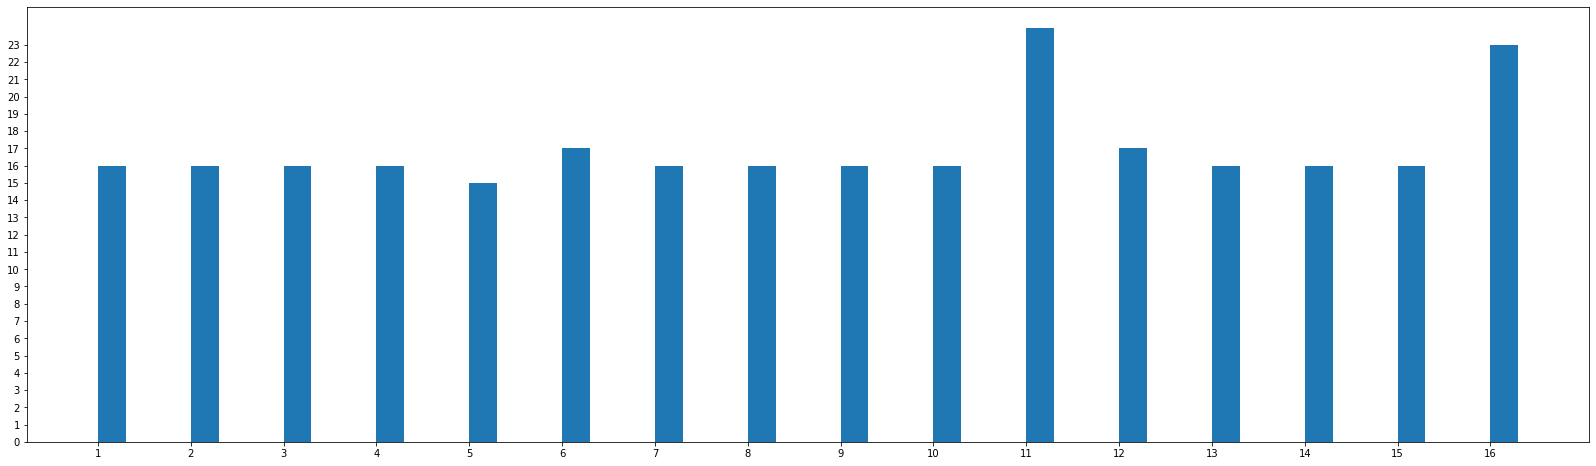

In [3]:
seed_values, seed_counts = myutils.get_seed_counts(seed)
plot_utils.bar_chart_seed(seed_values, seed_counts)

<h4>W-L % (X-Axis) and Average Points Per Game (Y-Axis)</h4>

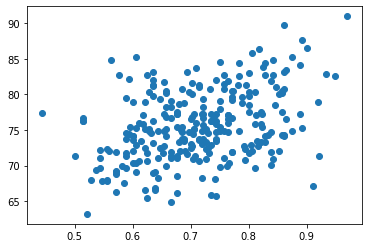

In [4]:
plot_utils.scatter_plot(w_l, pts)

In [5]:
elite_8_win_percentage = myutils.get_elite_win_percentage(basketball_table)

4
2


<h4>W-L% of Teams that Made the Elite Eight</h4>

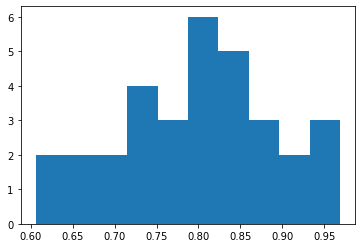

In [6]:
plot_utils.histogram_example(elite_8_win_percentage)

<h3>Dataset Accuracy Testing</h3>

In [7]:
# Creating MyZeroR and Random Classifiers to test validity of dataset
rand = MyRandomClassifier()
zero = MyZeroRClassifier()
knn_split = MyKNeighborsClassifier()
naivebayes_split = MyNaiveBayesClassifier() 

# Getting train/test splits for the data
split_X_train, split_X_test, split_y_train, split_y_test = myevaluation.train_test_split(X_train, y_train)

# fit both MyZeroR and Random Classifiers
zero.fit(split_X_train, split_y_train)
rand.fit(split_X_train, split_y_train)
knn_split.fit(split_X_train, split_y_train)
naivebayes_split.fit(split_X_train, split_y_train)

# predicting with both MyZeroR and Random Classifiers
zero_predictions = zero.predict(split_X_test)
rand_predictions = rand.predict(split_X_test)
naivebayes_predictions = naivebayes_split.predict(split_X_test)

knn_predictions = []
for i in range(len(split_X_test)):
    prediction = knn_split.predict(split_X_test)
    only_prediction = prediction[0]
    knn_predictions.append(only_prediction)

# Finding accuracy of each classifier
zero_accuracy = 0
rand_accuracy = 0
naivebayes_accuracy = 0
knn_accuracy = 0

for i in range(len(zero_predictions)):
    if zero_predictions[i] == split_y_test[i]:
        zero_accuracy += 1
        
for i in range(len(rand_predictions)):
    if rand_predictions[i] == split_y_test[i]:
        rand_accuracy += 1

for i in range(len(naivebayes_predictions)):
    if naivebayes_predictions[i] == split_y_test[i]:
        naivebayes_accuracy += 1
        
for i in range(len(knn_predictions)):
    if knn_predictions[i] == split_y_test[i]:
        knn_accuracy += 1
        
print("zero Accuracy: ", zero_accuracy)
print("Random Accuracy: ", rand_accuracy)
print("Naivebayes Accuracy: ", naivebayes_accuracy)
print("KNN Accuracy: ", knn_accuracy)
print(naivebayes_predictions)
print(knn_predictions)
print(len(split_y_test))


zero Accuracy:  82
Random Accuracy:  82
Naivebayes Accuracy:  78
KNN Accuracy:  82
['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No']
['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',